In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.stattools import adfuller

In [2]:
death_data = pd.read_csv('deaths.csv')
confirmed_data = pd.read_csv('confirmed.csv')
death_data = death_data.drop('Province/State', axis = 1)
confirmed_data = confirmed_data.drop('Province/State', axis = 1)
location_data = pd.DataFrame({'Country': confirmed_data['Country/Region'], 'Lat': confirmed_data['Lat'], 'Long' : confirmed_data['Long']}, columns=['Country', 'Lat', 'Long'])
location_data = location_data.groupby('Country').agg('mean')

In [3]:
death_data = death_data.drop('Lat', axis = 1)
death_data = death_data.drop('Long', axis = 1)
confirmed_data = confirmed_data.drop('Lat', axis = 1)
confirmed_data = confirmed_data.drop('Long', axis = 1)

In [4]:
confirmed_data = confirmed_data.groupby('Country/Region').agg('sum')
#confirmed_data = confirmed_data.join(location_data)
death_data = death_data.groupby('Country/Region').agg('sum')
#death_data = death_data.join(location_data)

In [5]:
globalnum1 = confirmed_data.sum(axis=0).rename("Global")
globalnum2 = death_data.sum(axis=0).rename("Global")
countryfilter = confirmed_data.index.isin(["South Korea", "Italy", "China", "US", "Japan", "United Kingdom", "France", "Korea South", "Global"])
confirmed_data = confirmed_data[countryfilter]
death_data = death_data[countryfilter]


In [6]:
# Dividie by population/100000 -> Each point represents 1/1000 of a percent
China = confirmed_data.iloc[0].divide(14377.22468)
France = confirmed_data.iloc[1].divide(652.73511)[2:]
Italy = confirmed_data.iloc[2].divide(604.87167)[9:]
Japan = confirmed_data.iloc[3].divide(1265.87521)
USA = confirmed_data.iloc[4].divide(3304.41184)
Korea = confirmed_data.iloc[5].divide(512.56069)

In [7]:
confirmed_data = confirmed_data.append(globalnum1)
confirmed_data.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
China,548,643,920,1406,2075,2877,5509,6087,8141,9802,...,80770,80823,80860,80887,80921,80932,80945,80977,81003,81033
France,0,0,2,3,3,3,4,5,5,5,...,957,1134,1217,1792,2289,2289,3672,4480,4513,6650
Italy,0,0,0,0,0,0,0,0,0,2,...,5883,7375,9172,10149,12462,12462,17660,21157,24747,27980
Japan,2,1,2,2,4,4,7,7,11,15,...,461,502,511,581,639,639,701,773,839,825
US,1,1,2,2,5,5,5,5,5,7,...,402,518,583,959,1281,1663,2179,2727,3499,4632


In [8]:
death_data = death_data.append(globalnum2)
death_data.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
China,17,18,26,42,56,82,131,133,171,213,...,3072,3100,3123,3139,3161,3172,3180,3193,3203,3217
France,0,0,0,0,0,0,0,0,0,0,...,11,19,19,33,48,48,79,91,91,148
Italy,0,0,0,0,0,0,0,0,0,0,...,233,366,463,631,827,827,1266,1441,1809,2158
Japan,0,0,0,0,0,0,0,0,0,0,...,6,6,10,10,15,16,19,22,22,27
US,0,0,0,0,0,0,0,0,0,0,...,17,21,22,28,36,40,47,54,63,85


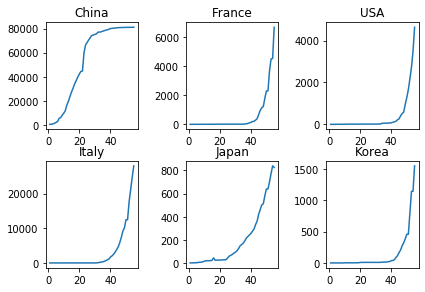

In [9]:
fig,a =  plt.subplots(2,3)
x = np.arange(1,5)
fig.tight_layout()
a[0][0].plot(range(1,56), confirmed_data.iloc[0])
a[0][0].set_title('China')
a[0][1].plot(range(1,56), confirmed_data.iloc[1])
a[0][1].set_title('France')
a[1][0].plot(range(1,56), confirmed_data.iloc[2])
a[1][0].set_title('Italy')
a[1][1].plot(range(1,56), confirmed_data.iloc[3])
a[1][1].set_title('Japan')
a[0][2].plot(range(1,56), confirmed_data.iloc[4])
a[0][2].set_title('USA')
a[1][2].plot(range(1,56), confirmed_data.iloc[5])
a[1][2].set_title('Korea')
plt.show()


In [10]:
# Dickey Fuller Test for stationarity
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    ema = timeseries.ewm(4).mean()
    rolmean = timeseries.rolling(7).mean()
    stat = rolmean-ema
    rolstd = timeseries.rolling(7).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    #plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(stat, color= 'green', label = 'EXP Smoothed')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    return ema

# Make timeseries stationary
def make_stationary(timeseries):
    new_timeseries = []
    ema = timeseries.ewm(4).mean()
    rolmean = timeseries.rolling(7).mean()
    stat = rolmean-ema
    for i in range(0, 6):
        stat[i] = timeseries[i]
    return stat

def get_ema(timeseries):
    return timeseries.ewm(4).mean()

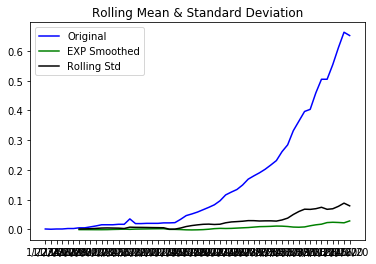

Results of Dickey-Fuller Test:


1/22/20    0.001580
1/23/20    0.001141
1/24/20    0.001321
1/25/20    0.001409
1/26/20    0.001930
1/27/20    0.002263
1/28/20    0.003090
1/29/20    0.003676
1/30/20    0.004834
1/31/20    0.006406
2/1/20     0.008461
2/2/20     0.010037
2/3/20     0.011257
2/4/20     0.012538
2/5/20     0.013541
2/6/20     0.018070
2/7/20     0.018414
2/8/20     0.018686
2/9/20     0.019062
2/10/20    0.019361
2/11/20    0.019599
2/12/20    0.020106
2/13/20    0.020511
2/14/20    0.020993
2/15/20    0.023598
2/16/20    0.028214
2/17/20    0.033010
2/18/20    0.038110
2/19/20    0.043768
2/20/20    0.049873
2/21/20    0.056495
2/22/20    0.064477
2/23/20    0.074813
2/24/20    0.084977
2/25/20    0.094844
2/26/20    0.105740
2/27/20    0.118406
2/28/20    0.130750
2/29/20    0.142678
3/1/20     0.154590
3/2/20     0.166964
3/3/20     0.179864
3/4/20     0.196188
3/5/20     0.213829
3/6/20     0.237422
3/7/20     0.262773
3/8/20     0.289532
3/9/20     0.312361
3/10/20    0.341683
3/11/20    0.374305


In [11]:
test_stationarity(Japan)

In [12]:
ewi = pd.read_csv('EWI.csv').transpose()
spy = pd.read_csv('SPY.csv').transpose()
ewq = pd.read_csv('EWQ.csv').transpose()
mchi = pd.read_csv('MCHI.csv').transpose()
ewj = pd.read_csv('EWJ.csv').transpose()

In [13]:
cols = range(0,214)
ewi.drop(ewi.columns[cols],axis=1,inplace=True)
spy.drop(spy.columns[cols],axis=1,inplace=True)
ewq.drop(ewq.columns[cols],axis=1,inplace=True)
mchi.drop(mchi.columns[cols],axis=1,inplace=True)
ewj.drop(ewj.columns[cols],axis=1,inplace=True)
ewj.drop([ewj.index[1], ewj.index[2], ewj.index[3], ewj.index[4]], axis = 0, inplace=True)
spy.drop([spy.index[1], spy.index[2], spy.index[3], spy.index[4]], axis = 0, inplace=True)
ewi.drop([ewi.index[1], ewi.index[2], ewi.index[3], ewi.index[4]], axis = 0, inplace=True)
mchi.drop([mchi.index[1], mchi.index[2], mchi.index[3], mchi.index[4]], axis = 0, inplace=True)
ewq.drop([ewq.index[1], ewq.index[2], ewq.index[3], ewq.index[4]], axis = 0, inplace=True)

In [14]:
ewi = ewi.replace('\d\d\d\d-', '', regex=True).replace('\d1-', '1-', regex=True).replace('\d2-', '2-', regex=True).replace('\d3-', '3-', regex=True).replace('-', '/', regex=True)
ewi.iloc[0] = ewi.iloc[0]+'/20'
mchi = mchi.replace('\d\d\d\d-', '', regex=True).replace('\d1-', '1-', regex=True).replace('\d2-', '2-', regex=True).replace('\d3-', '3-', regex=True).replace('-', '/', regex=True)
mchi.iloc[0] = mchi.iloc[0]+'/20'
ewj = ewj.replace('\d\d\d\d-', '', regex=True).replace('\d1-', '1-', regex=True).replace('\d2-', '2-', regex=True).replace('\d3-', '3-', regex=True).replace('-', '/', regex=True)
ewj.iloc[0] = ewj.iloc[0]+'/20'
spy = spy.replace('\d\d\d\d-', '', regex=True).replace('\d1-', '1-', regex=True).replace('\d2-', '2-', regex=True).replace('\d3-', '3-', regex=True).replace('-', '/', regex=True)
spy.iloc[0] = spy.iloc[0]+'/20'
ewq = ewq.replace('\d\d\d\d-', '', regex=True).replace('\d1-', '1-', regex=True).replace('\d2-', '2-', regex=True).replace('\d3-', '3-', regex=True).replace('-', '/', regex=True)
ewq.iloc[0] = ewq.iloc[0]+'/20'


In [15]:
ewi.columns = ewi.iloc[0]
ewi = ewi.drop('Date',axis = 0)
ewi = ewi.drop(['3/17/20','3/18/20'], axis = 1)

ewq.columns = ewq.iloc[0]
ewq = ewq.drop('Date',axis = 0)
ewq = ewq.drop(['3/17/20','3/18/20'], axis = 1)

ewj.columns = ewj.iloc[0]
ewj = ewj.drop('Date',axis = 0)
ewj = ewj.drop(['3/17/20','3/18/20'], axis = 1)

spy.columns = spy.iloc[0]
spy = spy.drop('Date',axis = 0)
spy = spy.drop(['3/17/20','3/18/20'], axis = 1)

mchi.columns = mchi.iloc[0]
mchi = mchi.drop('Date',axis = 0)
mchi = mchi.drop(['3/17/20','3/18/20'], axis = 1)

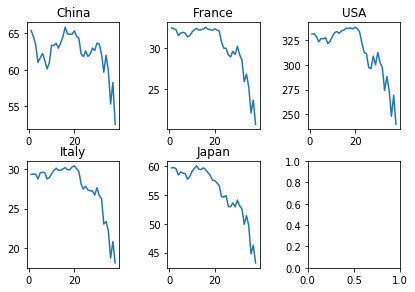

In [16]:
fig,a =  plt.subplots(2,3)
x = np.arange(1,5)
fig.tight_layout()
a[0][0].plot(range(1,39), mchi.iloc[0])
a[0][0].set_title('China')
a[0][1].plot(range(1,39), ewq.iloc[0])
a[0][1].set_title('France')
a[1][0].plot(range(1,39), ewi.iloc[0])
a[1][0].set_title('Italy')
a[1][1].plot(range(1,39), ewj.iloc[0])
a[1][1].set_title('Japan')
a[0][2].plot(range(1,39), spy.iloc[0])
a[0][2].set_title('USA')
plt.show()


In [17]:
confirmed_data.transpose().columns.name='Date'

In [18]:
def find_increment(prev, next, count):
    return ((next-prev)/(count+1))

def fill_series(series):
    prev = 0;
    next = series[0];
    count = 0;
    i = 0;
    while i < series.size:
        if series[i] == 0:
            count = count + 1
        elif count != 0:
            prev = next
            next = series[i]
            next = series[i]
            increment = find_increment(prev, next, count)
            add = increment
            while count != 0:
                # set previous values 
                series[i-count] = prev + add
                add += increment
                count = count - 1
            count = 0
            prev = next
            next = series[i]
        else:
            prev = next;
            next = series[i]
        i = i + 1

In [19]:
dates = pd.date_range('01/22/2020', '03/16/2020')
#SPY
spy_price = pd.Series(spy.iloc[0])
spy_price.index = pd.DatetimeIndex(spy_price.index)
spy_price = spy_price.reindex(dates, fill_value=0)
fill_series(spy_price)
spy_vol = pd.Series(spy.iloc[1])
spy_vol.index = pd.DatetimeIndex(spy_vol.index)
spy_vol = spy_vol.reindex(dates, fill_value=0)
fill_series(spy_price)
fill_series(spy_vol)
#EWQ
ewq_price = pd.Series(ewq.iloc[0])
ewq_price.index = pd.DatetimeIndex(ewq_price.index)
ewq_price = ewq_price.reindex(dates, fill_value=0)
fill_series(ewq_price)
ewq_vol = pd.Series(ewq.iloc[1])
ewq_vol.index = pd.DatetimeIndex(ewq_vol.index)
ewq_vol = ewq_vol.reindex(dates, fill_value=0)
fill_series(ewq_vol)
#EWJ
ewj_price = pd.Series(ewj.iloc[0])
ewj_price.index = pd.DatetimeIndex(ewj_price.index)
ewj_price = ewj_price.reindex(dates, fill_value=0)
fill_series(ewj_price)
ewj_vol = pd.Series(ewj.iloc[1])
ewj_vol.index = pd.DatetimeIndex(ewj_vol.index)
ewj_vol = ewj_vol.reindex(dates, fill_value=0)
fill_series(ewj_vol)
#EWI
ewi_price = pd.Series(ewi.iloc[0])
ewi_price.index = pd.DatetimeIndex(ewi_price.index)
ewi_price = ewi_price.reindex(dates, fill_value=0)
fill_series(ewi_price)
ewi_vol = pd.Series(ewi.iloc[1])
ewi_vol.index = pd.DatetimeIndex(ewi_vol.index)
ewi_vol = ewi_vol.reindex(dates, fill_value=0)
fill_series(ewi_vol)
#MCHI
mchi_price = pd.Series(mchi.iloc[0])
mchi_price.index = pd.DatetimeIndex(mchi_price.index)
mchi_price = mchi_price.reindex(dates, fill_value=0)
fill_series(mchi_price)
mchi_vol = pd.Series(mchi.iloc[1])
mchi_vol.index = pd.DatetimeIndex(mchi_vol.index)
mchi_vol = mchi_vol.reindex(dates, fill_value=0)
fill_series(mchi_vol)


In [20]:
spy = pd.concat([spy_price, spy_vol], axis=1)
ewq = pd.concat([ewq_price, ewq_vol], axis=1)
ewi = pd.concat([ewi_price, ewi_vol], axis=1)
ewj = pd.concat([ewj_price, ewj_vol], axis=1)
mchi = pd.concat([mchi_price, mchi_vol], axis=1)


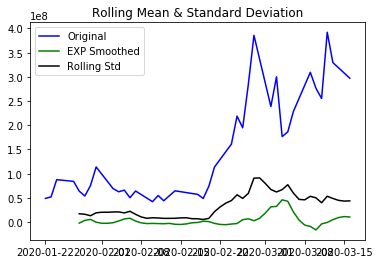

Results of Dickey-Fuller Test:


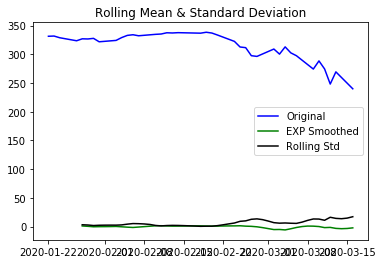

Results of Dickey-Fuller Test:


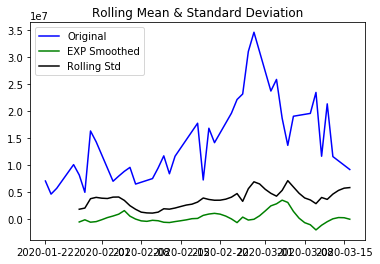

Results of Dickey-Fuller Test:


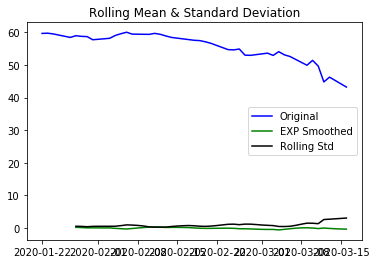

Results of Dickey-Fuller Test:


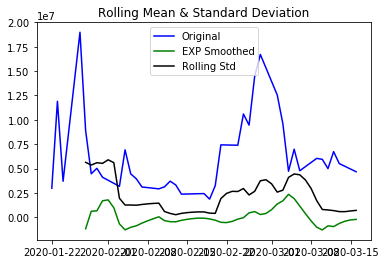

Results of Dickey-Fuller Test:


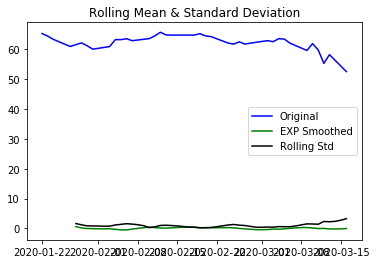

Results of Dickey-Fuller Test:


2020-01-22    65.349998
2020-01-23    64.877777
2020-01-24    64.272131
2020-01-25    63.705692
2020-01-26    63.138792
2020-01-27    62.559060
2020-01-28    62.318879
2020-01-29    62.292713
2020-01-30    62.054151
2020-01-31    61.618548
2020-02-01    61.351208
2020-02-02    61.207777
2020-02-03    61.157455
2020-02-04    61.607769
2020-02-05    61.958557
2020-02-06    62.298412
2020-02-07    62.431732
2020-02-08    62.584131
2020-02-09    62.751720
2020-02-10    62.931448
2020-02-11    63.254134
2020-02-12    63.763063
2020-02-13    63.987776
2020-02-14    64.155010
2020-02-15    64.288513
2020-02-16    64.395132
2020-02-17    64.480312
2020-02-18    64.548381
2020-02-19    64.698939
2020-02-20    64.671116
2020-02-21    64.598821
2020-02-22    64.397564
2020-02-23    64.093191
2020-02-24    63.706357
2020-02-25    63.324930
2020-02-26    63.169894
2020-02-27    62.897845
2020-02-28    62.744244
2020-02-29    62.676717
2020-03-01    62.678041
2020-03-02    62.734438
2020-03-03    62

In [21]:
# Reasonably stationary for EWJ, but not too stationary for SPY and MCHI
# Stretch goal: Try other forms of smoothing; exponential smoothing generates too many sharp changes in SPY/MCHI
test_stationarity(spy.iloc[:,1])
test_stationarity(spy.iloc[:,0])
test_stationarity(ewj.iloc[:,1])
test_stationarity(ewj.iloc[:,0])
test_stationarity(mchi.iloc[:,1])
test_stationarity(mchi.iloc[:,0])


In [22]:
# Modeling Japan
data = pd.concat([make_stationary(ewj.iloc[:,0]), make_stationary(ewj.iloc[:,1]), make_stationary(death_data.iloc[3]),
                  make_stationary(Japan).astype(float)], axis=1)

# Fitting the VAR Model
model = VAR(data)
model_fit = model.fit()
ewj_pred = model_fit.forecast(model_fit.y, steps=1)


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [23]:
ewj_pred[0][0] + get_ema(ewj.iloc[:,0])[-1] # Predicted 51.1304 EWJ

51.13042226758046

In [63]:
corona_data = confirmed_data.transpose()
df = data = pd.concat([ewj.iloc[:,0].astype(float), ewi.iloc[:,0].astype(float), ewq.iloc[:,0].astype(float),
                       mchi.iloc[:,0].astype(float), spy.iloc[:,0].astype(float), 
                      corona_data.iloc[:,0], corona_data.iloc[:,1], corona_data.iloc[:,2], corona_data.iloc[:,3], 
                      corona_data.iloc[:,4], death_data.transpose().iloc[:,6]], axis=1)
#df = df.rename(columns ={"Global" : "Deaths"})
#df.rename(columns={df.columns[0]: "EWJ" }, inplace = True)
df.columns = ['EWJ', 'EWI','EWQ','MCHI', 'SPY', 'China', 'France', 'Italy', 'Japan', 'USA', 'Global Deaths']


In [64]:
df

,EWJ,EWI,EWQ,MCHI,SPY,China,France,Italy,Japan,USA,Global Deaths
2020-01-22,59.689999,29.340000,32.470001,65.349998,331.339996,548,0,0,2,1,17
2020-01-23,59.759998,29.389999,32.410000,64.500000,331.720001,643,0,0,1,1,18
2020-01-24,59.529999,29.370001,32.250000,63.400002,328.769989,920,2,0,2,2,26
2020-01-25,59.173332,29.166667,32.016666,62.600001,327.013326,1406,3,0,2,2,42
2020-01-26,58.816666,28.963334,31.783333,61.800001,325.256663,2075,3,0,4,5,56
2020-01-27,58.459999,28.760000,31.549999,61.000000,323.500000,2877,3,0,4,5,82
2020-01-28,58.980000,29.540001,31.850000,61.610001,326.890015,5509,4,0,7,5,131
2020-01-29,58.790001,29.610001,31.950001,62.209999,326.619995,6087,5,0,7,5,133
2020-01-30,58.709999,29.559999,31.850000,61.259998,327.679993,8141,5,0,11,5,171
2020-01-31,57.750000,28.780001,31.400000,60.110001,321.730011,9802,5,2,15,7,213


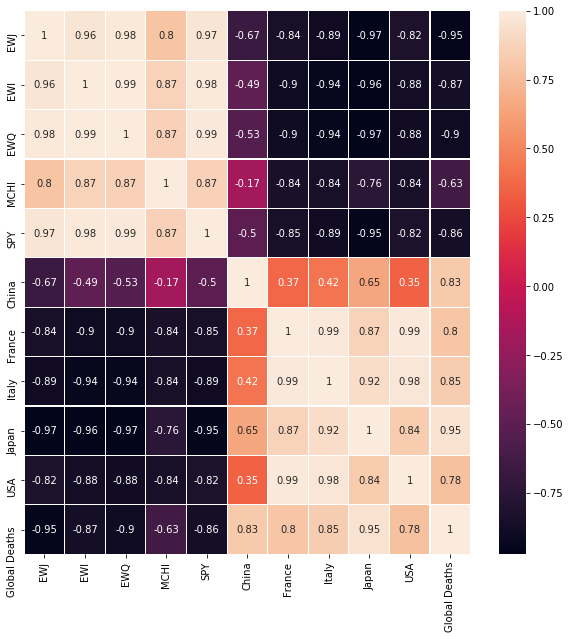

In [65]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10,10))   
sns.heatmap(corr, annot = True, linewidths = 0.1, ax = ax)
